In [38]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
from netCDF4 import Dataset, num2date, date2num
import os
import datetime as dt
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

NSpath='J:/ACCfront/CTOH_NorthernSubantarcticFront_weekly_1993_2021.nc'
PFpath='J:/ACCfront/CTOH_PolarFront_weekly_1993_2021.nc'
SFpath='J:/ACCfront/CTOH_SubantarcticFront_weekly_1993_2021.nc'



In [39]:
mydata_NS=Dataset(NSpath)
NS=mydata_NS['SAF_N'][:]
LON_NS=mydata_NS['longitude'][:]
TIME_NS=mydata_NS['time']

mydata_PF=Dataset(PFpath)
PF=mydata_PF['PF'][:]
LON_PF=mydata_PF['longitude'][:]

mydata_SF=Dataset(SFpath)
SF=mydata_SF['SAF'][:]
LON_SF=mydata_SF['longitude'][:]

time=TIME_NS[:]
time_ref=TIME_NS.units
myTime=num2date(time,time_ref)
myTime=pd.date_range("19930104", "20211227", freq='W-MON')

In [40]:
NS_re=[]
for i,f in zip(LON_NS,NS):
    tmp_LON_co = np.where( (i>200)&(i<250) )[0]
    NS_re.append(np.mean(f[tmp_LON_co]))
NS_re=np.array(NS_re)

PF_re=[]
for i,f in zip(LON_PF,PF):
    tmp_LON_co = np.where( (i>200)&(i<250) )[0]
    PF_re.append(np.mean(f[tmp_LON_co]))
PF_re=np.array(PF_re)
    
SF_re=[]
for i,f in zip(LON_SF,SF):
    tmp_LON_co = np.where( (i>200)&(i<250) )[0]
    SF_re.append(np.mean(f[tmp_LON_co]))
SF_re=np.array(SF_re)
    
# tmp_LON_co=np.array(tmp_LON_co)

In [41]:
t_label=myTime.strftime('%y')

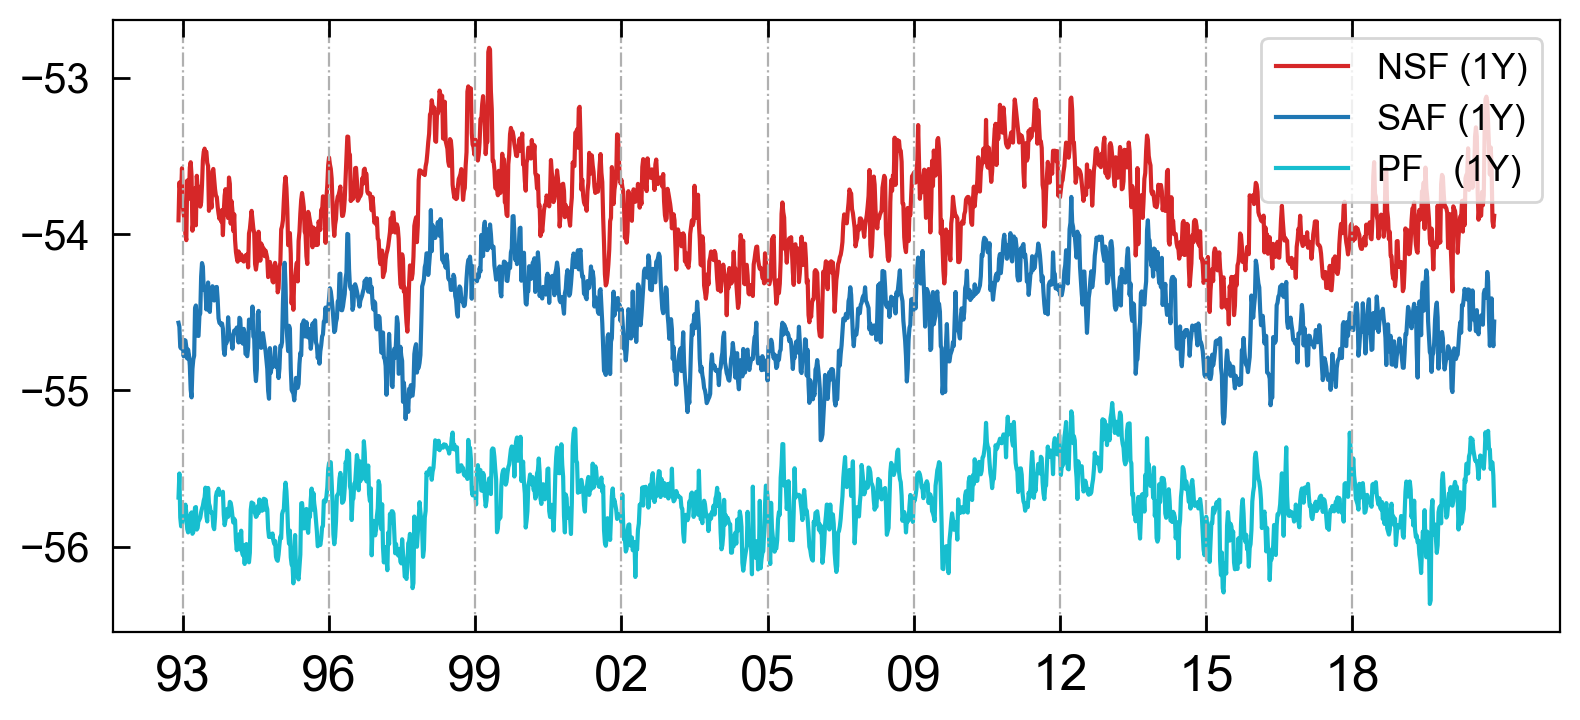

In [42]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(8,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,NS_re, label='NSF (1Y)',color='C3',linewidth=1.5,zorder=0)
f2 = axs.plot(myTime,SF_re, label='SAF (1Y)',color='C0',linewidth=1.5,zorder=0)
f2 = axs.plot(myTime,PF_re, label='PF   (1Y)',color='C9',linewidth=1.5,zorder=0)

# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = myTime[5::12*2*7]
xtick_labels = t_label[5::12*2*7]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-5)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()

In [43]:
mySig=pd.DataFrame({'NSF':NS_re,'SAF':SF_re,'PF':PF_re},index=myTime)
mySig12=mySig.rolling(12,center=True).mean()

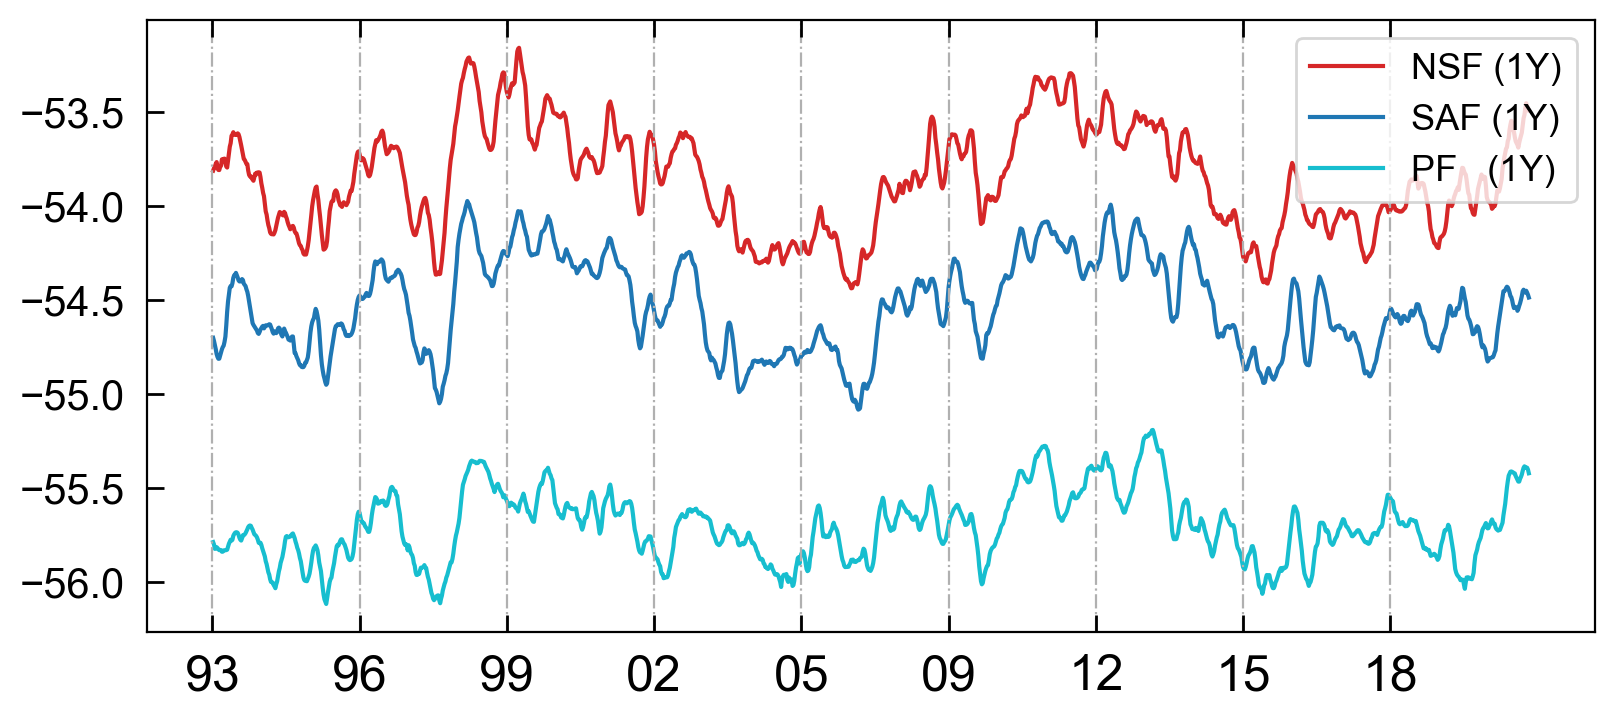

In [51]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(8,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,mySig12['NSF'], label='NSF (1Y)',color='C3',linewidth=1.5,zorder=0)
f2 = axs.plot(myTime,mySig12['SAF'], label='SAF (1Y)',color='C0',linewidth=1.5,zorder=0)
f2 = axs.plot(myTime,mySig12['PF'], label='PF   (1Y)',color='C9',linewidth=1.5,zorder=0)

# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = myTime[5::12*2*7]
xtick_labels = t_label[5::12*2*7]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-5)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()

In [53]:
mySig12_N=(mySig12-mySig12.mean())/mySig12.std()

In [54]:
ModeN=5
myEEMD_pth='C:/Users/shjo/OneDrive/mySO/EEMD_sigs/OHC700_1993_2020_200E250E_60S53S/Figs/'
with open(myEEMD_pth+'EEMD_'+f'{ModeN:02d}'+'_mode.pickle', 'rb') as f:
    data = pickle.load(f)
Esig9317=data.mean(axis=1).loc['1993-01':'2021-12']
Esig9317_N=(Esig9317-Esig9317.mean())/Esig9317.std()

In [55]:
# myTime=pd.date_range("1993-01", "2017-12", freq='1M')

In [56]:
print(Esig9317_N.index.shape)
print(myTime.shape)
print(mySig12_N.shape)
print(mySig12.shape)



(336,)
(1513,)
(1513, 3)
(1513, 3)


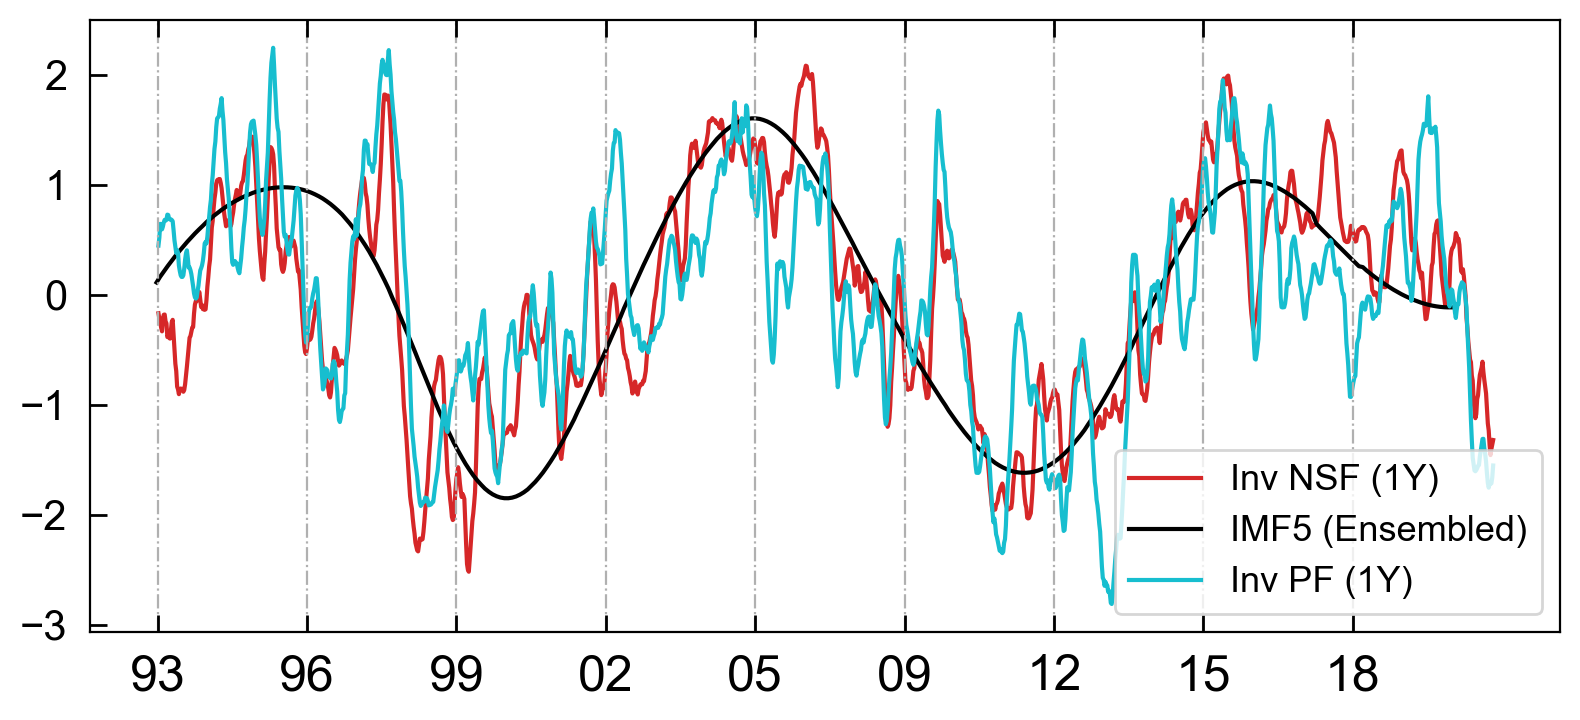

In [61]:
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(8,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(myTime,-mySig12_N['NSF'], label='Inv NSF (1Y)',color='C3',linewidth=1.5,zorder=0)
f2 = axs.plot(Esig9317_N.index,Esig9317_N[:], label='IMF5 (Ensembled)',color='k',linewidth=1.5,zorder=0)
f3 = axs.plot(myTime,-mySig12_N['PF'], label='Inv PF (1Y)',color='C9',linewidth=1.5,zorder=0)

# axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = myTime[5::12*2*7]
xtick_labels = t_label[5::12*2*7]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
plt.legend(fontsize=Label_size-5)
if 0:
    # plt.savefig(wnpth'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.wpth+'/'+save_name,bbox_inches='tight')
plt.show()
